<h1 align="center"><b>Opening a bubble teashop in Paris</b></h1>

In [1]:
#Libraries 
from bs4 import BeautifulSoup #Library for pulling data out of HTML and XML file
import requests # library to handle requests
import pandas as pd #library for data analsysis
import numpy as np #library to handle data in a vectorized manner
import folium #Map rendering
from geopy.geocoders import Nominatim #Library to geolocate a query
from pandas.io.json import json_normalize #Library for normalizing semi-structured JSON data into a flat table.
from sklearn.cluster import KMeans #Library kmeans ...
from matplotlib import cm,colors
import seaborn as sns
import matplotlib.pyplot as plt

### Build the code to scrape borough, neighborhood and population of Paris

In [2]:
#Get html from wiki page and create soup object
url='https://fr.wikipedia.org/wiki/Arrondissements_de_Paris#R%C3%A9partition_de_la_population'

df=pd.read_html(url)[3]
df.head()

Arr.             Nom Superficie(ha)  \
  Arr.             Nom Superficie(ha)   
0  1er          Louvre            183   
1   2e          Bourse             99   
2   3e          Temple            117   
3   4e  Hôtel-de-Ville            160   
4   5e        Panthéon            254   

  Population (municipale pour 2010 et 2015)                                   \
                                       1872     1954    1999    2006    2010   
0                                    74 286   38 926  16 888  17 745  17 308   
1                                    73 578   43 857  19 585  21 259  23 009   
2                                    89 687   65 312  34 248  34 721  35 652   
3                                    95 003   66 621  30 675  28 268  28 012   
4                                    96 689  106 443  58 849  61 475  60 938   

                  Densité (hab./km²)                                          
     2015    2017               1872    1954    1999    2006    2010    2015  
0  16 545  16 395             40 593  21 271   9 228   9 697   9 458   9 041  
1  20 796  21 042             74 321  44 300  19 783  21 474  23 241  21 006  
2  35 049  34 389             76 656  55 822  29 272  29 676  30 472  29 956  
3  27 146  28 370             59 377  41 638  19 172  18 211  17 507  16 966  
4  59 333  59 631             38 067  41 907  23 169  24 203  23 991  23 359

In [3]:
#Drop a level because I don't need it
df.columns = df.columns.droplevel() 
df

,Arr.,Nom,Superficie(ha),1872,1954,1999,2006,2010,2015,2017,1872,1954,1999,2006,2010,2015
0,1er,Louvre,183,74 286,38 926,16 888,17 745,17 308,16 545,16 395,40 593,21 271,9 228,9 697,9 458,9 041
1,2e,Bourse,99,73 578,43 857,19 585,21 259,23 009,20 796,21 042,74 321,44 300,19 783,21 474,23 241,21 006
2,3e,Temple,117,89 687,65 312,34 248,34 721,35 652,35 049,34 389,76 656,55 822,29 272,29 676,30 472,29 956
3,4e,Hôtel-de-Ville,160,95 003,66 621,30 675,28 268,28 012,27 146,28 370,59 377,41 638,19 172,18 211,17 507,16 966
4,5e,Panthéon,254,96 689,106 443,58 849,61 475,60 938,59 333,59 631,38 067,41 907,23 169,24 203,23 991,23 359
5,6e,Luxembourg,215,90 288,88 200,44 919,45 278,43 451,42 428,41 976,41 994,41 023,20 893,21 060,20 210,19 734
6,7e,Palais-Bourbon,409,78 553,104 412,56 985,56 612,57 974,54 133,52 193,19 206,25 529,13 933,13 842,14 175,13 235
7,8e,Élysée,388,75 796,80 827,39 314,39 088,41 280,36 694,37 367,19 535,20 832,10 132,10 074,10 639,9 457
8,9e,Opéra[note 1],218,103 767,102 287,55 838,58 497,60 139,59 408,60 071,47 600,46 921,25 614,26 833,27 587,27 251
9,10e,"Entrepôt, anciennement Enclos Saint-Laurent",289,135 392,129 179,89 612,92 082,95 394,91 770,90 836,46 848,44 699,31 008,31 862,33 008,31 754


In [4]:
#Drop columns Superficie(ha), about population before 2017 and all the density 
df.drop(['Superficie(ha)', '1872', '1954', '1999', '2006', '2010',
       '2015', '1872', '1954', '1999', '2006', '2010', '2015'],1,inplace=True)

#Drop rows which containing NaN
df.drop([20,21,22], inplace=True)

#Rename each columns
df.rename(columns={'Arr.': 'Borough', 
                   'Nom': 'Neighborhood',
                 '2017': 'Population', }, inplace=True)

df["Neighborhood"].replace({"Opéra[note 1]": "Opéra", 
                            "Entrepôt, anciennement Enclos Saint-Laurent": "Entrepôt",
                            "Reuilly (hors bois de Vincennes)":"Reuilly",
                            "Passy (hors bois de Boulogne)": "Passy"
                           }, inplace=True)

In [5]:
#Geospatial data
df_geo=pd.read_csv('/Users/juliagau/Desktop/Projets/Coursera_Capstone/borough_coordinates.csv', sep=';')
df_geo.head()

,geo_point,geo_shape,ID_GEOFLA,Code Commune,Code Insee,Commune,x_chf_lieu,y_chf_lieu,x_centroid,y_centroid,...,Code D̩épartement,Année,R̩égion,D̩épartement,Statut,Code R̩égion,NOM_REG,code_com,nom_com,CODE_VILLE
0,"48.8769868607,2.33753841595","{""type"": ""Polygon"", ""coordinates"": [[[2.325761...",COMMUNE00000000000018163,109,75109,PARIS-9E-ARRONDISSEMENT,651677,6863807,651445,6864413,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,109,PARIS-9E-ARRONDISSEMENT,75056
1,"48.8635257742,2.40121168869","{""type"": ""Polygon"", ""coordinates"": [[[2.413270...",COMMUNE00000000000024623,120,75120,PARIS-20E-ARRONDISSEMENT,655946,6862971,655961,6862890,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,120,PARIS-20E-ARRONDISSEMENT,75056
2,"48.8292048923,2.3267445538","{""type"": ""Polygon"", ""coordinates"": [[[2.314145...",COMMUNE00000000000033524,114,75114,PARIS-14E-ARRONDISSEMENT,650587,6859427,650444,6859239,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,114,PARIS-14E-ARRONDISSEMENT,75056
3,"48.8444087298,2.35049826183","{""type"": ""Polygon"", ""coordinates"": [[[2.344559...",COMMUNE00000000000017059,105,75105,PARIS-5E-ARRONDISSEMENT,651888,6860877,652337,6860432,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,105,PARIS-5E-ARRONDISSEMENT,75056
4,"48.8628851439,2.35993164253","{""type"": ""Polygon"", ""coordinates"": [[[2.350091...",COMMUNE00000000000018221,103,75103,PARIS-3E-ARRONDISSEMENT,653171,6862837,652950,6862781,...,75,2016,ILE-DE-FRANCE,PARIS,Commune simple,11,ILE-DE-FRANCE,103,PARIS-3E-ARRONDISSEMENT,75056


In [6]:
#Split data 
split_data=df_geo["geo_point"].str.split(",")
data=split_data.to_list()
names=["Latitude", "Longitude"]
df_geo2=pd.DataFrame(data, columns=names)

df_geo2['Borough']=pd.DataFrame({'Borough': ["9e", "20e", "14e","5e","3e", 
                                             "13e","8e","11e", "16e","7e",
                                            "6e", "18e","19e","17e", "15e",
                                            "10e", "4e","12e","2e", "1er"]})
df_geo2.head()

,Latitude,Longitude,Borough
0,48.8769868607,2.33753841595,9e
1,48.8635257742,2.40121168869,20e
2,48.8292048923,2.3267445538,14e
3,48.8444087298,2.35049826183,5e
4,48.8628851439,2.35993164253,3e


In [7]:
#Merge df_geo2 and df
df_coord_merged = pd.merge(df, df_geo2,on='Borough')

#Show the first five rows of the dataframe with postal code, borough, neighborhood, latitude and logitude data
df_coord_merged.head()

,Borough,Neighborhood,Population,Latitude,Longitude
0,1er,Louvre,16 395,48.8625262113,2.33630086089
1,2e,Bourse,21 042,48.8682182328,2.34268958704
2,3e,Temple,34 389,48.8628851439,2.35993164253
3,4e,Hôtel-de-Ville,28 370,48.8542874923,2.35759608215
4,5e,Panthéon,59 631,48.8444087298,2.35049826183


In [8]:
df_coord_merged['Latitude']=df_coord_merged['Latitude'].map(float)
df_coord_merged['Longitude']=df_coord_merged['Longitude'].map(float)

In [9]:
#Create an intial map of Paris using first entries latitude and longitude values of the neighborhoods in Paris
map_paris = folium.Map(location=[df_coord_merged["Latitude"][0], df_coord_merged["Longitude"][0]], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood, population in zip(df_coord_merged['Latitude'], df_coord_merged['Longitude'], 
                                           df_coord_merged['Borough'], df_coord_merged['Neighborhood'],
                                          df_coord_merged['Population']):
    label = '{}, {}, Population: {}'.format(neighborhood, borough, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
       radius=15,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [10]:
#Start utilizing the Foursquare API to explore the neighborhoods and segment them

CLIENT_ID='ZVUJ2SL1JDLBYKV51ZQZA4SEM4ELAIMS3T5CQO14D00EIL3M' #Foursquare ID
CLIENT_SECRET='ASSXNQPBNYPKQF0UWGIAQR2VZ2H1EJGGEPX0EVO111LWZWPJ' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: ZVUJ2SL1JDLBYKV51ZQZA4SEM4ELAIMS3T5CQO14D00EIL3M
CLIENT_SECRET:ASSXNQPBNYPKQF0UWGIAQR2VZ2H1EJGGEPX0EVO111LWZWPJ


In [11]:
#Get data of first neighborhood
ng_latitude=df_coord_merged['Latitude'][0] #Neighborhood latitude value
ng_longitude=df_coord_merged['Longitude'][0] #neighborhood longitude value
ng_name = df_coord_merged['Neighborhood'][0] #Neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(ng_name, 
                                                               ng_latitude, 
                                                               ng_longitude))

Latitude and longitude values of Louvre are 48.8625262113, 2.33630086089.


In [12]:
#Function for the getting values

LIMIT = 500 #Limit of number of venues returned by Foursquare API
radius = 1000 #Define radius

#Create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ng_latitude, 
    ng_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
#results

#Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
        
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

venues=results['response']['groups'][-1]['items']
    
nearby_venues=json_normalize(venues) #Flatten JSON

#Filter columns
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues=nearby_venues.loc[:, filtered_columns]

#Filter the category for each row
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type, axis=1)

#Clean columns
nearby_venues.columns=[col.split(".")[-1] for col in nearby_venues.columns]

#Show the first five rows of the dataframe
nearby_venues.head()

#print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

,name,categories,lat,lng
0,Musée du Louvre,Art Museum,48.860847,2.336440
1,Palais Royal,Historic Site,48.863236,2.337127
2,Comédie-Française,Theater,48.863088,2.336612
3,Place du Palais Royal,Plaza,48.862523,2.336688
4,Vestige de la Forteresse du Louvre,Historic Site,48.861577,2.333508


In [13]:
#To all the neighborhoods in Paris

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'],
                v['venue']['id'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],
                v['venue']['location']['distance'], 
                v['venue']['categories'][0]['name'])])
    
    nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    

    nearby_venues.columns = ['Neighborhood','Neighborhood Latitude', 'Neighborhood Longitude', 
                  'Venue Name', 'Venue ID', 'Venue Latitude', 'Venue Longitude', 
                  'Venue Distance','Venue Category']
    
    return(nearby_venues)

paris_venues=getNearbyVenues(df_coord_merged['Neighborhood'],df_coord_merged['Latitude'],df_coord_merged['Longitude'] )

#Unique categories
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))
paris_venues.head()

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Buttes-Montmartre
Buttes-Chaumont
Ménilmontant
There are 222 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue ID,Venue Latitude,Venue Longitude,Venue Distance,Venue Category
0,Louvre,48.862526,2.336301,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,187,Art Museum
1,Louvre,48.862526,2.336301,Palais Royal,4adcda09f964a520ed3321e3,48.863236,2.337127,99,Historic Site
2,Louvre,48.862526,2.336301,Comédie-Française,4b48b4b0f964a5207c5326e3,48.863088,2.336612,66,Theater
3,Louvre,48.862526,2.336301,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,28,Plaza
4,Louvre,48.862526,2.336301,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,230,Historic Site


In [14]:
print('Top 5 distinct venues:')
paris_venues[['Venue ID','Venue Category']].drop_duplicates().groupby('Venue Category').count()[['Venue ID']].rename(columns={"Venue ID": "Count"}).sort_values(by=['Count'], ascending=False)[:5]


Top 5 distinct venues:


,Count
Venue Category,
French Restaurant,254
Hotel,96
Italian Restaurant,75
Plaza,49
Bakery,48


In [15]:
#Filter tea shop  

tea_room_bar_list =['Tea Room', 'Juice Bar','Restaurant', 'Shop']
tea_list=['Taiwanese Restaurant','Bubble Tea Shop','Tea Shop','Asian Restaurant']

paris_venues['RestFlag']=False
for restCat in tea_room_bar_list:
    paris_venues['RestFlag']=paris_venues['RestFlag'] | paris_venues['Venue Category'].str.contains(restCat)
    
neighborhood_tea_room=paris_venues[paris_venues['RestFlag'] == True].iloc[:,:-1]
boba_tea=neighborhood_tea_room[neighborhood_tea_room['Venue Category'].isin(tea_list)]
other_restaurants=neighborhood_tea_room[ ~neighborhood_tea_room['Venue Category'].isin(tea_list)]

print('Total number of tea room ... :', len(neighborhood_tea_room['Venue ID'].unique()))
print('Total number of bubble tea:', len(boba_tea['Venue ID'].unique()))
print('Percentage of bubble tea : {:.2f}%'.format(len(boba_tea['Venue ID'].unique()) / len(neighborhood_tea_room['Venue ID'].unique()) * 100))


Total number of tea room ... : 846
Total number of bubble tea: 22
Percentage of bubble tea : 2.60%


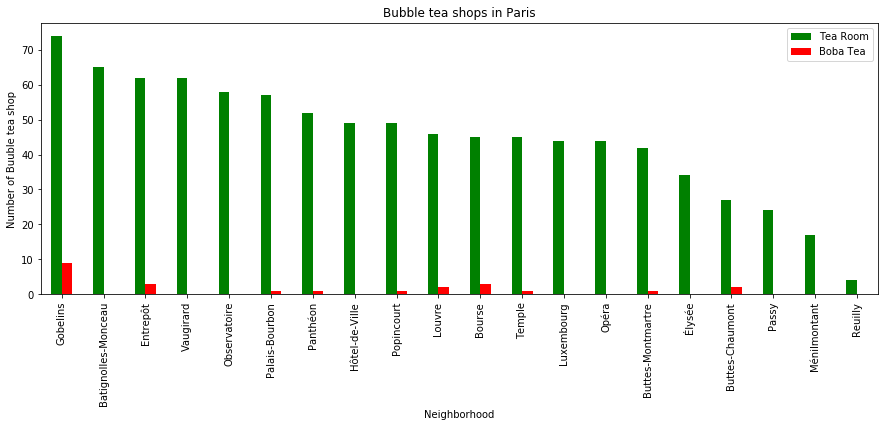

In [42]:
#Get counts of bubble tea shop
df_boba_counts=neighborhood_tea_room.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "Tea Room"})[['Tea Room']]

#Find neighborhoods that does not have any bubble tea
no_boba_list = list(set(paris_venues['Neighborhood']) - set(neighborhood_tea_room['Neighborhood']))

if no_boba_list != []:
    df_boba_counts = df_boba_counts.append(pd.DataFrame( {'Neighborhood': no_boba_list, 'Tea Count': [0] * len(no_boba_list)}).set_index('Neighborhood'))

#Reset df_boba_counts index 
df_boba_counts.reset_index(inplace=True)

df_boba_tea_counts =  boba_tea.groupby(['Neighborhood']).count().rename(columns={"Venue Category": "Boba Tea"})[['Boba Tea']]

#Find neighborhoods that does not have any tea room ... 
no_boba_list = list(set(paris_venues['Neighborhood']) - set(boba_tea['Neighborhood']))

if no_boba_list != []:
    df_boba_tea_counts = df_boba_tea_counts.append (pd.DataFrame( {'Neighborhood' : no_boba_list  , 'Boba Tea': [0] * len(no_boba_list) } ).set_index('Neighborhood'))

df_boba_tea_counts.reset_index(inplace=True)
df_boba_counts= df_boba_counts.merge(df_boba_tea_counts).set_index('Neighborhood')
df_boba_counts= df_boba_counts.sort_values(by=['Tea Room'],ascending =False)

#print('{} neighborhoods do not have any bubble tea shop'.format(len(no_boba_list)))

#Plot 
df_boba_counts[['Tea Room','Boba Tea']].plot(kind='bar', color=['green','red'],figsize=(15,5))
plt.title('Bubble tea shops in Paris')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Buuble tea shop')
plt.show()


In [17]:
#Analyze each neighborhood

#One hot encoding
paris_onehot=pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

#Add neighborhood column back to dataframe
paris_onehot['Neighborhood']=paris_venues['Neighborhood'] 

#Move neighborhood column to the first column
fixed_columns=[paris_onehot.columns[-1]]+list(paris_onehot.columns[:-1])
paris_onehot=paris_onehot[fixed_columns]

#Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
paris_grouped=paris_onehot.groupby('Neighborhood').mean().reset_index()
#paris_grouped.head()

#Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues=10
indicators=['st', 'nd', 'rd']

#Create columns according to number of top venues
columns=['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#Create a new dataframe
paris_venues_sorted=pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood']=paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:]=return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Italian Restaurant,Hotel,Restaurant,Bakery,Pastry Shop,Park,Creperie,Turkish Restaurant,Mediterranean Restaurant
1,Bourse,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Cocktail Bar,Pedestrian Plaza,Spa,Coffee Shop,Bakery,Restaurant
2,Buttes-Chaumont,French Restaurant,Bar,Café,Bistro,Italian Restaurant,Pool,Supermarket,Pizza Place,Bed & Breakfast,Seafood Restaurant
3,Buttes-Montmartre,French Restaurant,Bar,Bistro,Pizza Place,Restaurant,Café,Middle Eastern Restaurant,Plaza,Italian Restaurant,Wine Bar
4,Entrepôt,French Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Bistro,Breakfast Spot,Pizza Place,Bakery,Asian Restaurant


In [18]:
#Cluster Neighborhoods

#Set number of clusters
kclusters=int(len(df_coord_merged["Neighborhood"].unique()) / 4)
paris_grouped_clustering=paris_grouped.drop('Neighborhood', 1)

#Run k-means clustering
kmeans=KMeans(n_clusters=kclusters, random_state=1).fit(paris_grouped_clustering)

#Add clustering labels
paris_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged=df_coord_merged.copy()
paris_merged.rename(columns={'Neighborhood':'Neighborhood'}, inplace=True)

#Merge paris_merged with paris_venues_sorted to add latitude/longitude for each neighborhood
paris_merged=paris_merged.join(paris_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged.head() #Check the last columns!

,Borough,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1er,Louvre,16 395,48.862526,2.336301,2,Hotel,French Restaurant,Japanese Restaurant,Plaza,Coffee Shop,Art Museum,Historic Site,Wine Bar,Garden,Café
1,2e,Bourse,21 042,48.868218,2.342690,2,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Cocktail Bar,Pedestrian Plaza,Spa,Coffee Shop,Bakery,Restaurant
2,3e,Temple,34 389,48.862885,2.359932,2,French Restaurant,Art Gallery,Clothing Store,Bookstore,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Wine Bar,Gourmet Shop
3,4e,Hôtel-de-Ville,28 370,48.854287,2.357596,2,French Restaurant,Plaza,Hotel,Cocktail Bar,Garden,Clothing Store,Coffee Shop,Ice Cream Shop,Wine Bar,Restaurant
4,5e,Panthéon,59 631,48.844409,2.350498,2,French Restaurant,Plaza,Bakery,Hotel,Italian Restaurant,Museum,Science Museum,Café,Coffee Shop,Indie Movie Theater


In [52]:
#Visualization of the resulting clusters

#Create map
map_paris = folium.Map(location=[df_coord_merged["Latitude"][0], df_coord_merged["Longitude"][0]], zoom_start=12)

#Set color scheme for the clusters
x=np.arange(kclusters)
ys=[i+x+(i*x)**2 for i in range(kclusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

#Add markers to the map
markers_colors=[]
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label=folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_paris)
       
map_paris

In [43]:
#Cluster 1
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Reuilly,0,Lake,French Restaurant,Zoo Exhibit,Track,Recreation Center,Hotel,Diner,Café,Monument / Landmark,Supermarket


In [44]:
#Cluster 2
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,1,French Restaurant,Hotel,Plaza,Coffee Shop,Historic Site,Italian Restaurant,History Museum,Garden,Café,Cocktail Bar
13,Observatoire,1,French Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Bistro,Bar,Bakery,Pizza Place,Vietnamese Restaurant,Restaurant
14,Vaugirard,1,French Restaurant,Italian Restaurant,Hotel,Persian Restaurant,Bakery,Coffee Shop,Plaza,Lebanese Restaurant,Korean Restaurant,Japanese Restaurant
15,Passy,1,French Restaurant,Bakery,Italian Restaurant,Park,Plaza,Art Museum,Garden,Japanese Restaurant,Lake,Diner
16,Batignolles-Monceau,1,French Restaurant,Italian Restaurant,Hotel,Restaurant,Bakery,Pastry Shop,Park,Creperie,Turkish Restaurant,Mediterranean Restaurant


In [45]:
#Cluster 3
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,2,Hotel,French Restaurant,Japanese Restaurant,Plaza,Coffee Shop,Art Museum,Historic Site,Wine Bar,Garden,Café
1,Bourse,2,French Restaurant,Wine Bar,Hotel,Japanese Restaurant,Cocktail Bar,Pedestrian Plaza,Spa,Coffee Shop,Bakery,Restaurant
2,Temple,2,French Restaurant,Art Gallery,Clothing Store,Bookstore,Italian Restaurant,Coffee Shop,Sandwich Place,Restaurant,Wine Bar,Gourmet Shop
3,Hôtel-de-Ville,2,French Restaurant,Plaza,Hotel,Cocktail Bar,Garden,Clothing Store,Coffee Shop,Ice Cream Shop,Wine Bar,Restaurant
4,Panthéon,2,French Restaurant,Plaza,Bakery,Hotel,Italian Restaurant,Museum,Science Museum,Café,Coffee Shop,Indie Movie Theater
5,Luxembourg,2,French Restaurant,Plaza,Hotel,Garden,Pastry Shop,Wine Bar,Coffee Shop,Cocktail Bar,Bistro,Bookstore
7,Élysée,2,Hotel,French Restaurant,Boutique,Garden,Clothing Store,Tailor Shop,Art Gallery,Italian Restaurant,Café,Sporting Goods Shop
8,Opéra,2,French Restaurant,Hotel,Italian Restaurant,Wine Bar,Bakery,Plaza,Coffee Shop,Concert Hall,Gourmet Shop,Cheese Shop


In [46]:
#Cluster 4
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Entrepôt,3,French Restaurant,Coffee Shop,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Bistro,Breakfast Spot,Pizza Place,Bakery,Asian Restaurant
10,Popincourt,3,French Restaurant,Bar,Bistro,Restaurant,Italian Restaurant,Cocktail Bar,Bakery,Moroccan Restaurant,Pizza Place,Bookstore
17,Buttes-Montmartre,3,French Restaurant,Bar,Bistro,Pizza Place,Restaurant,Café,Middle Eastern Restaurant,Plaza,Italian Restaurant,Wine Bar
18,Buttes-Chaumont,3,French Restaurant,Bar,Café,Bistro,Italian Restaurant,Pool,Supermarket,Pizza Place,Bed & Breakfast,Seafood Restaurant
19,Ménilmontant,3,Bar,French Restaurant,Theater,Bakery,Café,Bistro,Music Venue,Bookstore,Bus Station,Tapas Restaurant


In [47]:
#Cluster 5
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Gobelins,4,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,French Restaurant,Chinese Restaurant,Hotel,Bakery,Japanese Restaurant,Italian Restaurant,Café
